In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.impute import KNNImputer
from sklearn.metrics.pairwise import nan_euclidean_distances
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import chi2_contingency
import itertools
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor, Pool, cv 
from sklearn.linear_model import Ridge

In [5]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

In [2]:
data=pd.read_csv('train_data.csv')

In [3]:
data.shape

(8523, 12)

In [4]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [777]:
# ! pip install sweetviz

In [123]:
import sweetviz as sv


# Create and generate the EDA report
report = sv.analyze(data_1)

# Show the report
report.show_html('eda_report.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)


Report eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


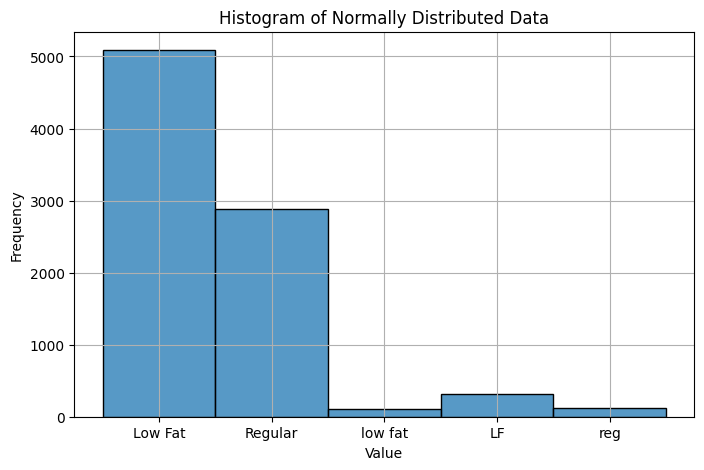

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Item_Fat_Content'], bins=30)  
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Normally Distributed Data")
plt.grid(True)
plt.show()

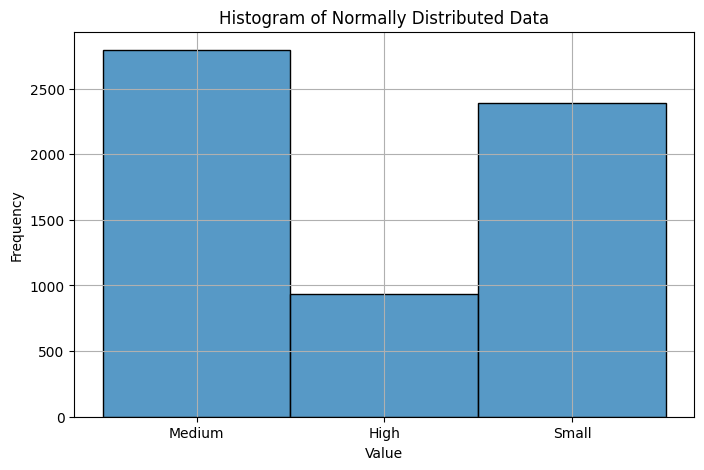

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Outlet_Size'], bins=30)  
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Normally Distributed Data")
plt.grid(True)
plt.show()

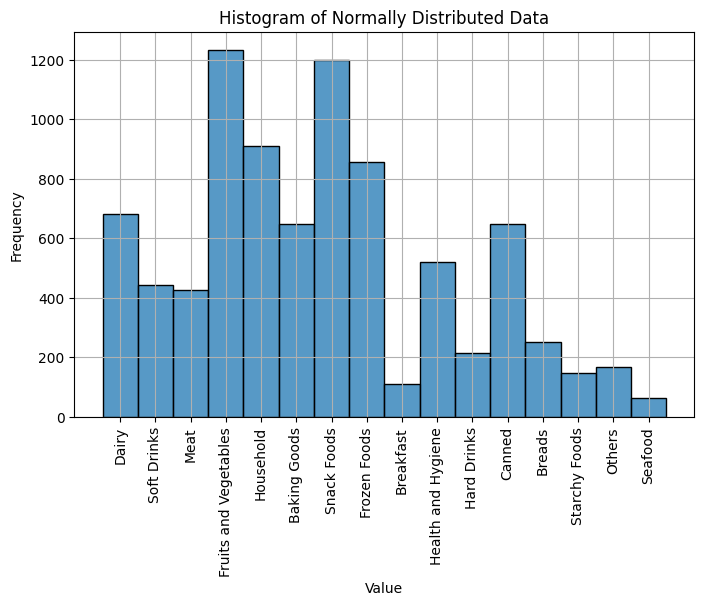

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Item_Type'], bins=30)  
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Normally Distributed Data")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

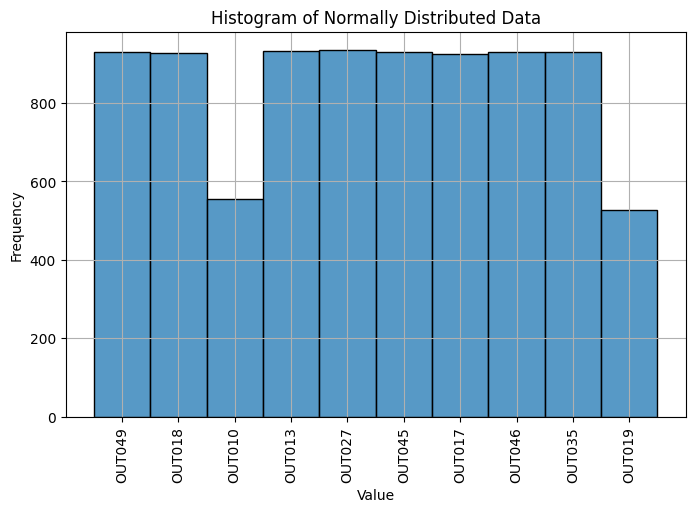

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Outlet_Identifier'], bins=30)  
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Normally Distributed Data")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

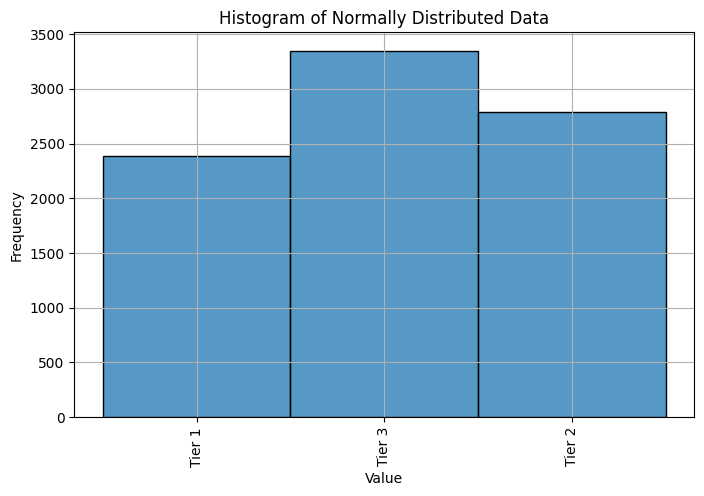

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Outlet_Location_Type'], bins=30)  
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Normally Distributed Data")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

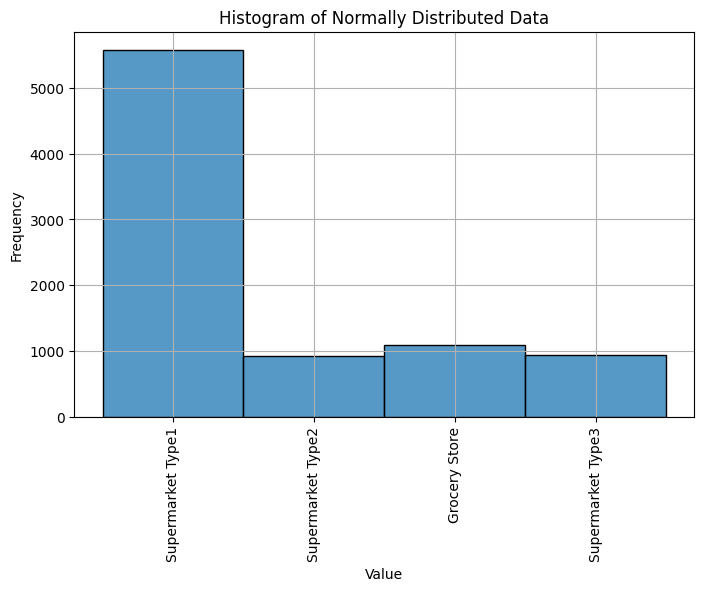

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Outlet_Type'], bins=30)  
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Normally Distributed Data")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

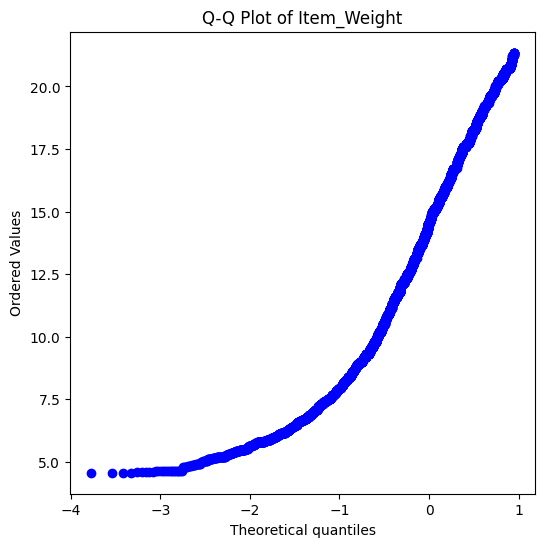

In [13]:
plt.figure(figsize=(6, 6))
stats.probplot(data['Item_Weight'], dist="norm", plot=plt)
plt.title(f"Q-Q Plot of {'Item_Weight'}")
plt.show()

In [779]:
data_1=data.copy()

In [780]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [781]:
missing_values_count = data_1.isnull().sum()

# Display the count of missing values
print(missing_values_count)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [782]:
data_1['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [783]:
test_df=pd.read_csv('test_data.csv')

In [784]:
data_1['Item_Weight']=data_1['Item_Weight'].interpolate(method="linear")
test_df['Item_Weight']=test_df['Item_Weight'].interpolate(method="linear")

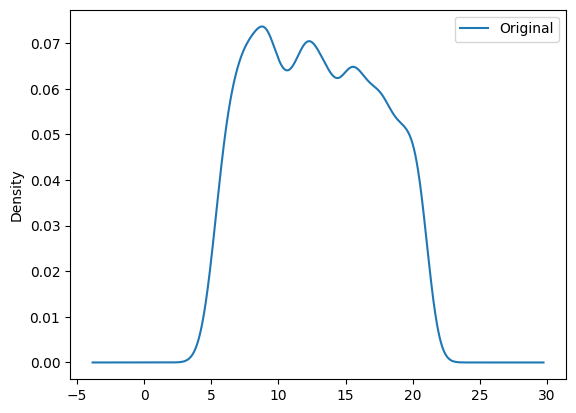

In [785]:
data_1['Item_Weight'].plot(kind = "kde",label="Original")

# data_1['Item_Weight_interpolate'].plot(kind = "kde",label = "interploate")

plt.legend()
plt.show()

In [786]:
# # # data_1['Item_Weight'] = data_1['Item_Weight'].fillna(data_1['Item_Weight'].median())
data_1['Outlet_Size'] = data_1['Outlet_Size'].fillna(data_1['Outlet_Size'].mode()[0])
test_df['Outlet_Size'] = test_df['Outlet_Size'].fillna(test_df['Outlet_Size'].mode()[0])

In [787]:
missing_values_count = data_1.isnull().sum()

# Display the count of missing values
print(missing_values_count)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [788]:
data_1['Item_Visibility']=data_1['Item_Visibility'].replace(0,np.nan).interpolate(method='pcpih')
test_df['Item_Visibility']=test_df['Item_Visibility'].replace(0,np.nan).interpolate(method='pcpih')   

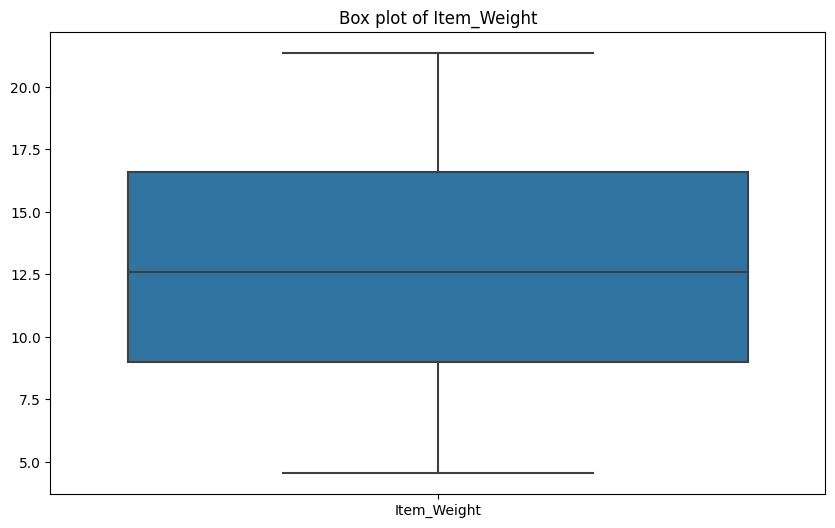

In [789]:
columns = ['Item_Weight']

# Create a box plot for each specified column
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_1[columns])  # Pass the dataframe with the columns as data

# Show the plot
plt.title('Box plot of Item_Weight')
plt.show()

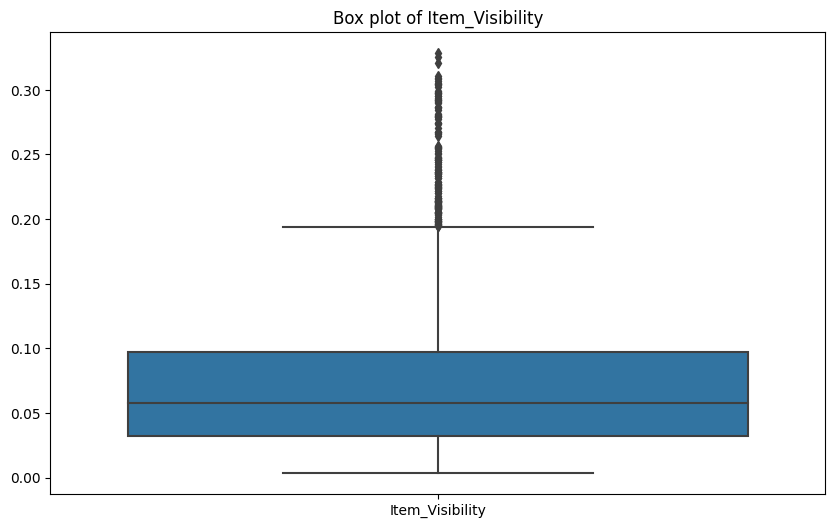

In [790]:
columns = ['Item_Visibility']

# Create a box plot for each specified column
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_1[columns])  # Pass the dataframe with the columns as data

# Show the plot
plt.title('Box plot of Item_Visibility')
plt.show()

<Axes: ylabel='Density'>

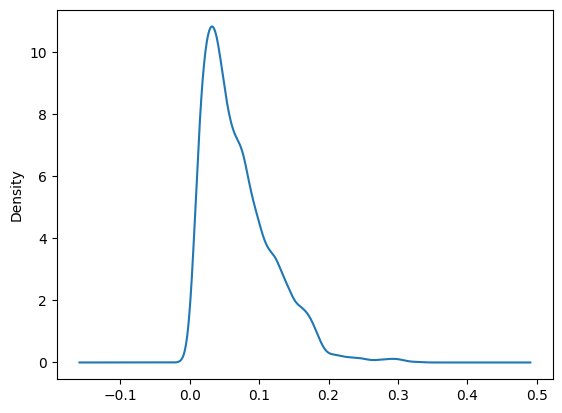

In [791]:
data_1['Item_Visibility'].plot(kind = "kde",label="Original")

In [792]:
data_1['Item_Visibility'].describe()

count    8523.000000
mean        0.070340
std         0.049493
min         0.003575
25%         0.032405
50%         0.058182
75%         0.097094
max         0.328391
Name: Item_Visibility, dtype: float64

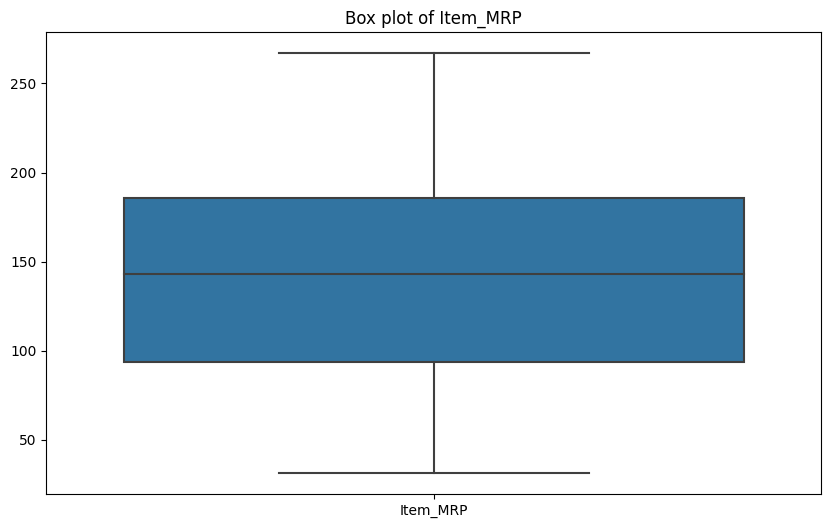

In [793]:
columns = ['Item_MRP']

# Create a box plot for each specified column
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_1[columns])  # Pass the dataframe with the columns as data

# Show the plot
plt.title('Box plot of Item_MRP')
plt.show()

In [778]:
# Q1 = data_1['Item_Visibility'].quantile(0.25)
# Q3 = data_1['Item_Visibility'].quantile(0.75)
# IQR = Q3 - Q1

# # Define outlier thresholds
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Remove outliers
# data_1 = data_1[(data_1['Item_Visibility'] >= lower_bound) & (data_1['Item_Visibility'] <= upper_bound)]


# Q1 = test_df['Item_Visibility'].quantile(0.25)
# Q3 = test_df['Item_Visibility'].quantile(0.75)
# IQR = Q3 - Q1

# # Define outlier thresholds
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Remove outliers
# test_df = test_df[(test_df['Item_Visibility'] >= lower_bound) & (test_df['Item_Visibility'] <= upper_bound)]


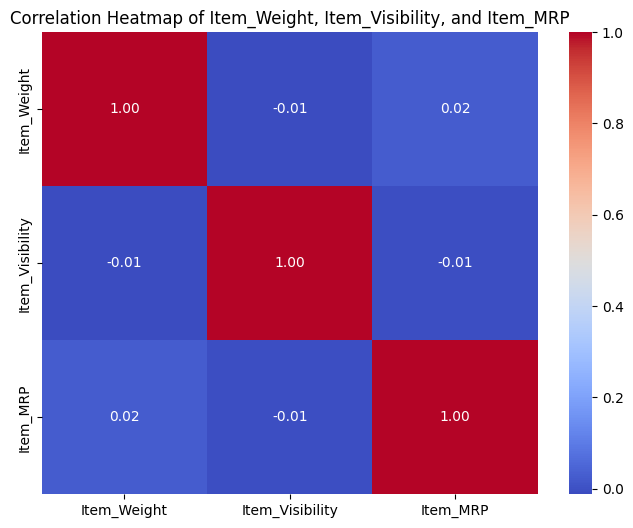

In [203]:
columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

# Compute the correlation matrix
correlation_matrix = data_1[columns].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

# Show the plot
plt.title('Correlation Heatmap of Item_Weight, Item_Visibility, and Item_MRP')
plt.show()

### Checking the relationship Between the categorical variable

In [261]:
categorical_cols = data_1.select_dtypes(include=['object', 'category']).columns

# Dictionary to store results
chi2_results = {}

# Perform Chi-square test for each pair of categorical variables
for var1, var2 in itertools.combinations(categorical_cols, 2):
    contingency_table = pd.crosstab(data_1[var1], data_1[var2])  # Create contingency table
    chi2, p, dof, expected = chi2_contingency(contingency_table)  # Chi-square test
    
    chi2_results[f"{var1} vs {var2}"] = p  # Store the p-value

# Convert results into a DataFrame
chi2_df = pd.DataFrame(chi2_results.items(), columns=['Variable Pair', 'P-Value'])

# Display results sorted by significance
chi2_df_sorted = chi2_df.sort_values(by='P-Value')

# Show the results
print(chi2_df_sorted)

                                Variable Pair   P-Value
0         Item_Identifier vs Item_Fat_Content  0.000000
18        Outlet_Size vs Outlet_Location_Type  0.000000
17           Outlet_Identifier vs Outlet_Type  0.000000
16  Outlet_Identifier vs Outlet_Location_Type  0.000000
15           Outlet_Identifier vs Outlet_Size  0.000000
19                 Outlet_Size vs Outlet_Type  0.000000
20        Outlet_Location_Type vs Outlet_Type  0.000000
1                Item_Identifier vs Item_Type  0.000000
6               Item_Fat_Content vs Item_Type  0.000000
9    Item_Fat_Content vs Outlet_Location_Type  0.940454
8             Item_Fat_Content vs Outlet_Size  0.947492
10            Item_Fat_Content vs Outlet_Type  0.991939
13          Item_Type vs Outlet_Location_Type  0.996304
12                   Item_Type vs Outlet_Size  0.997633
14                   Item_Type vs Outlet_Type  0.998934
7       Item_Fat_Content vs Outlet_Identifier  0.999541
11             Item_Type vs Outlet_Identifier  1

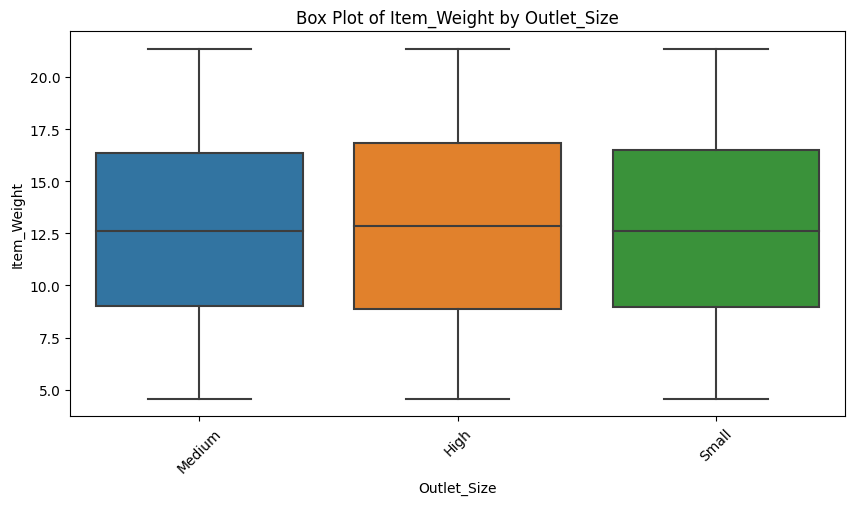

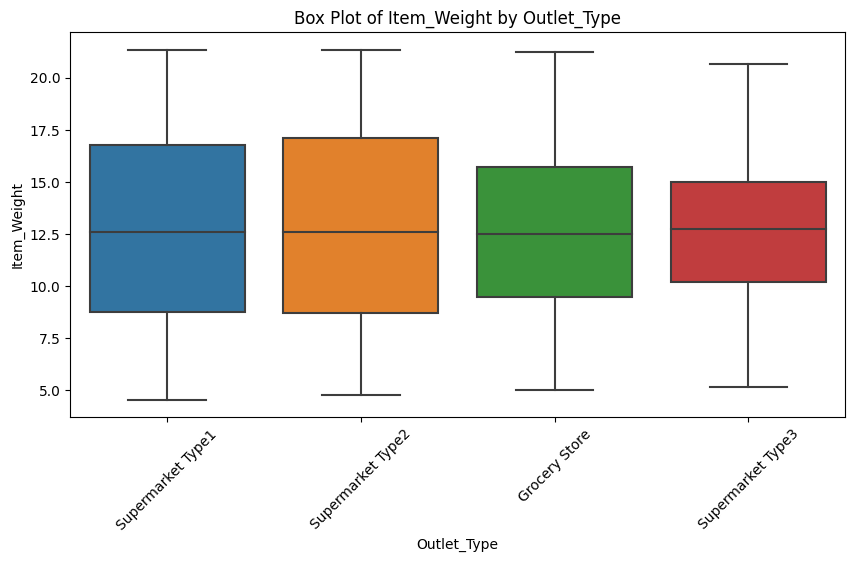

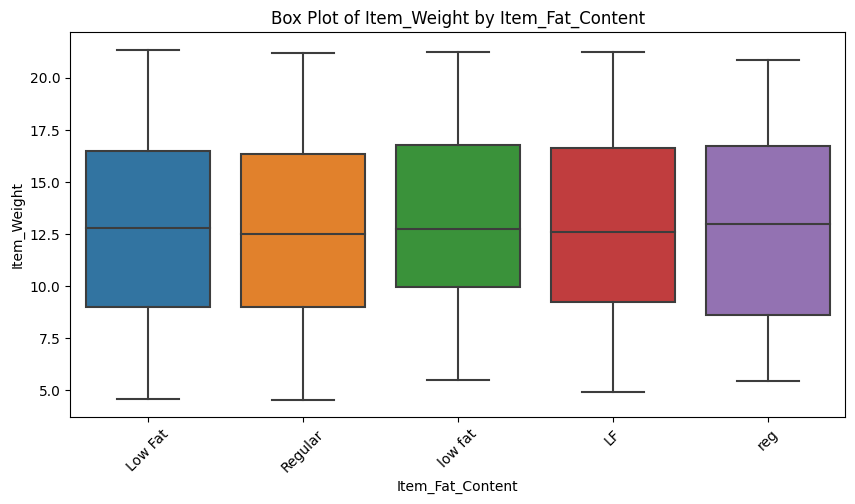

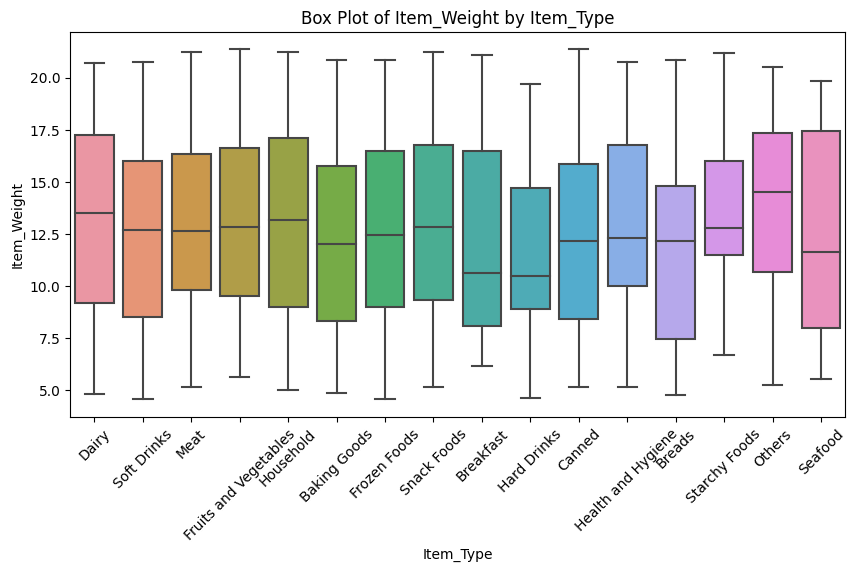

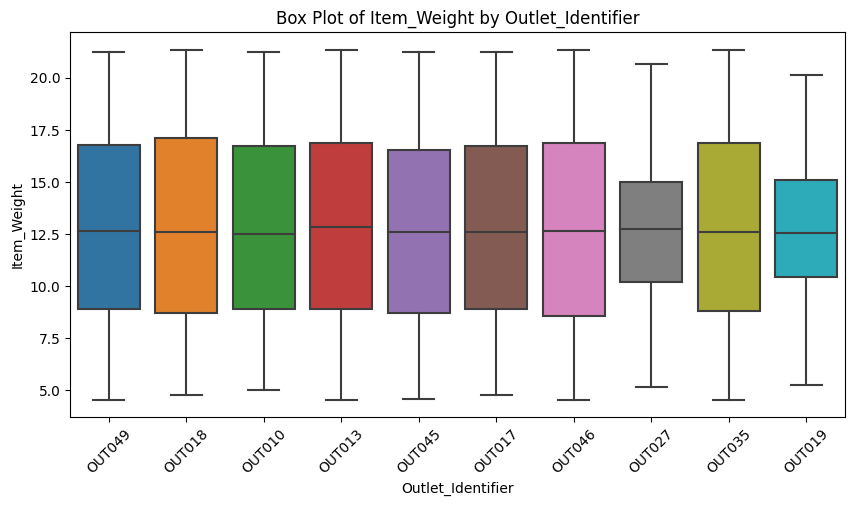

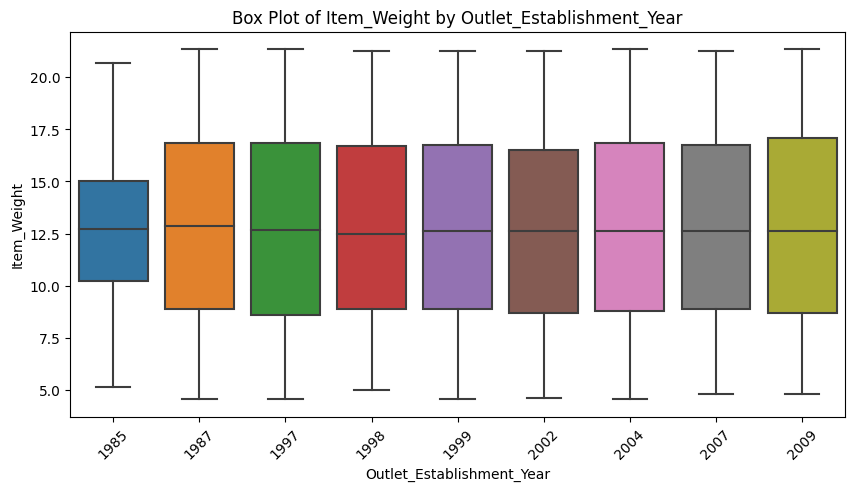

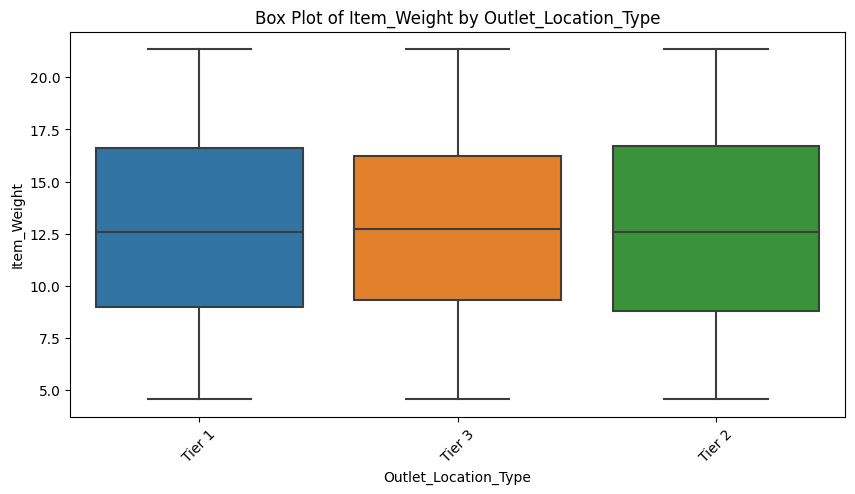

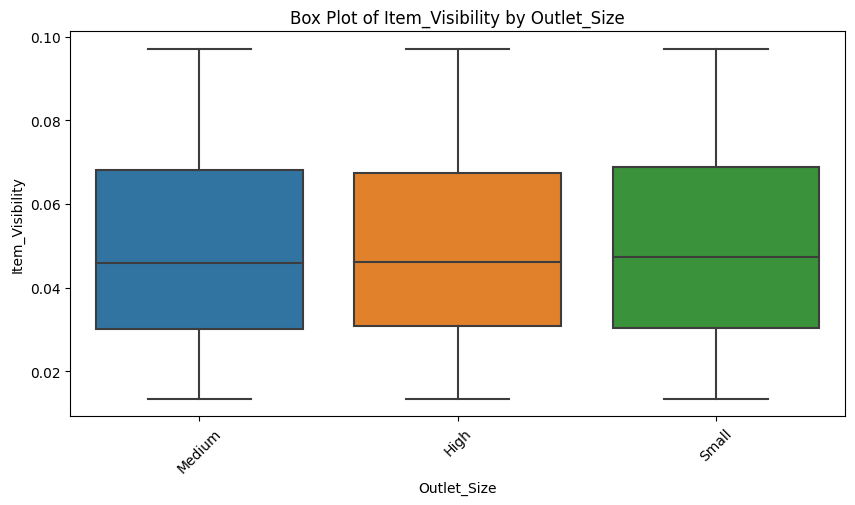

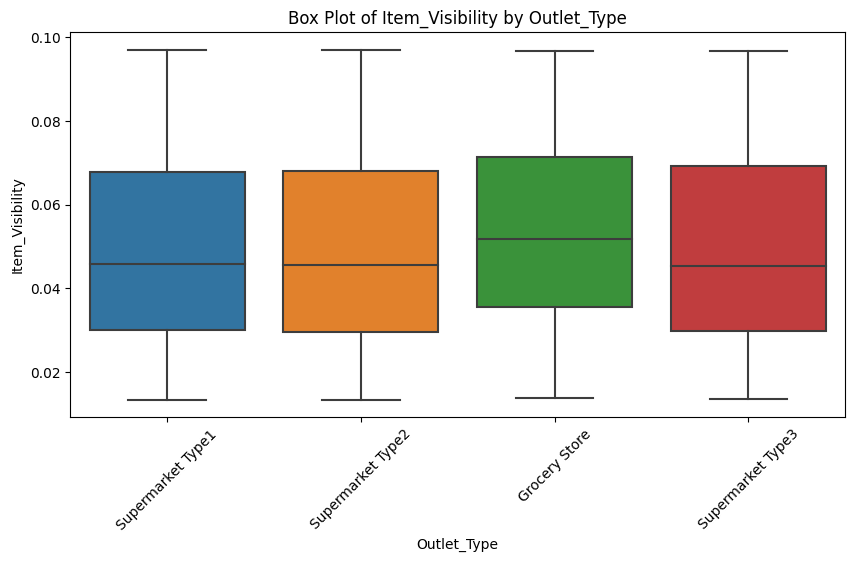

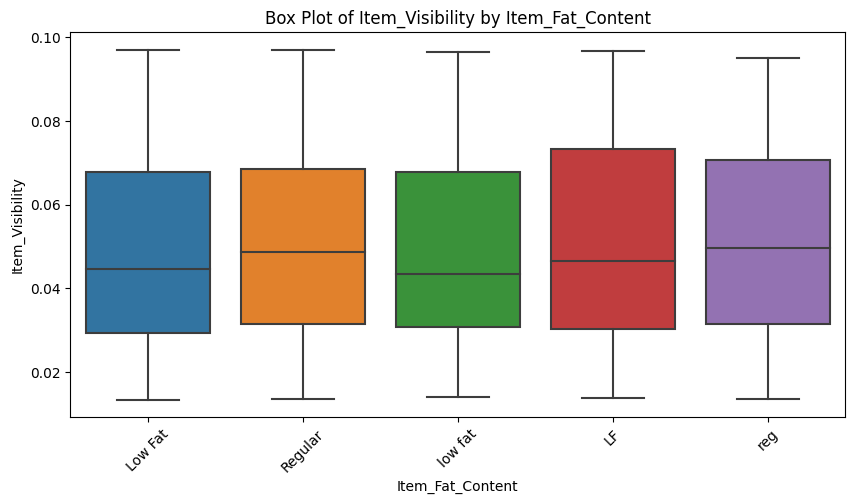

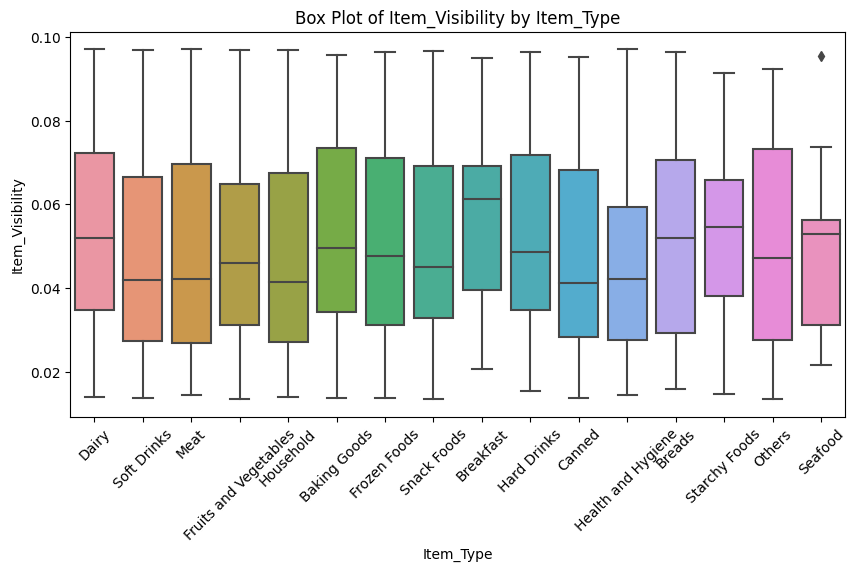

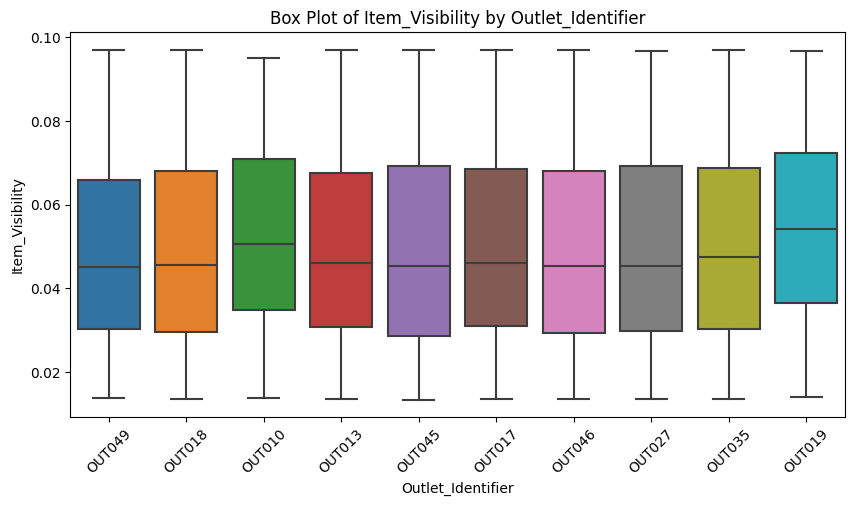

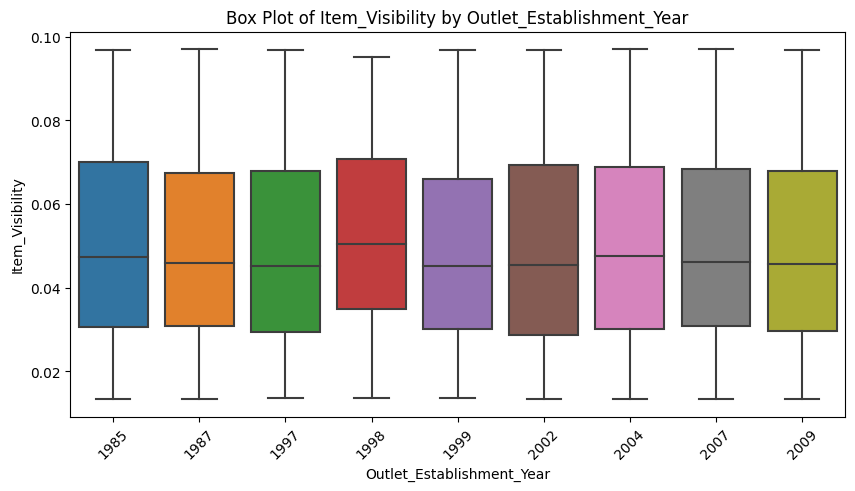

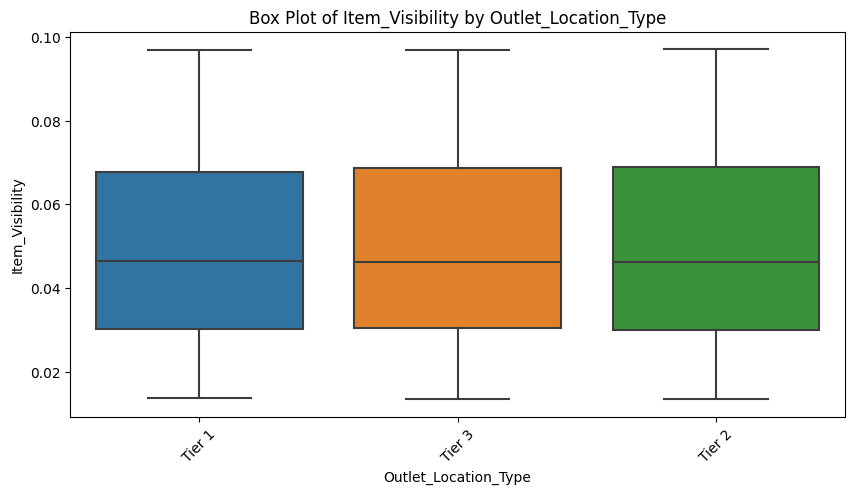

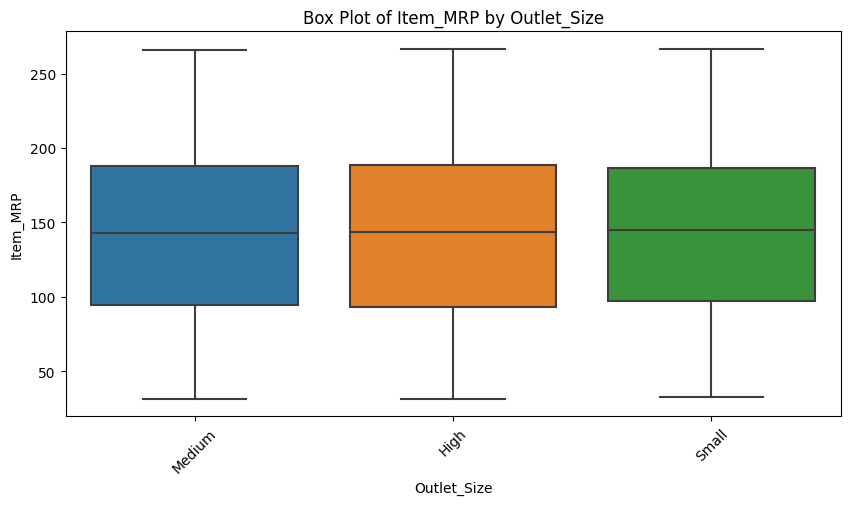

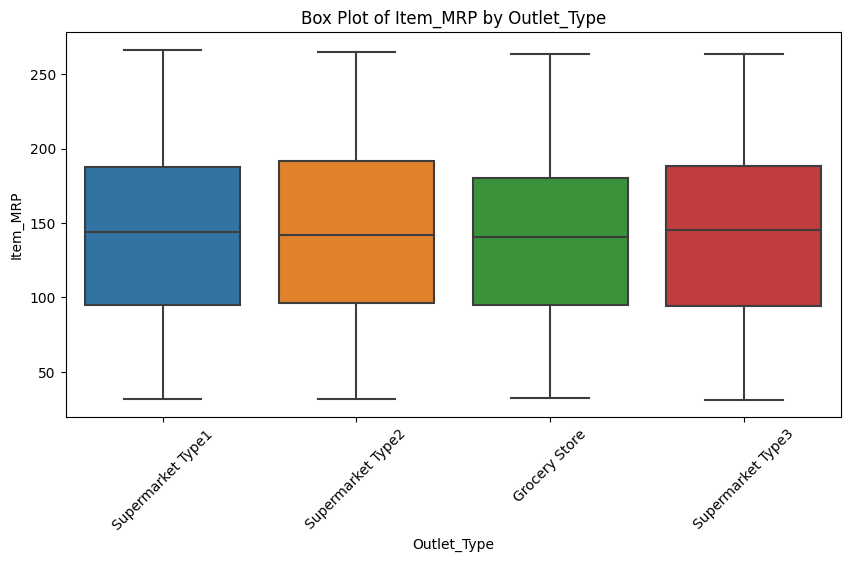

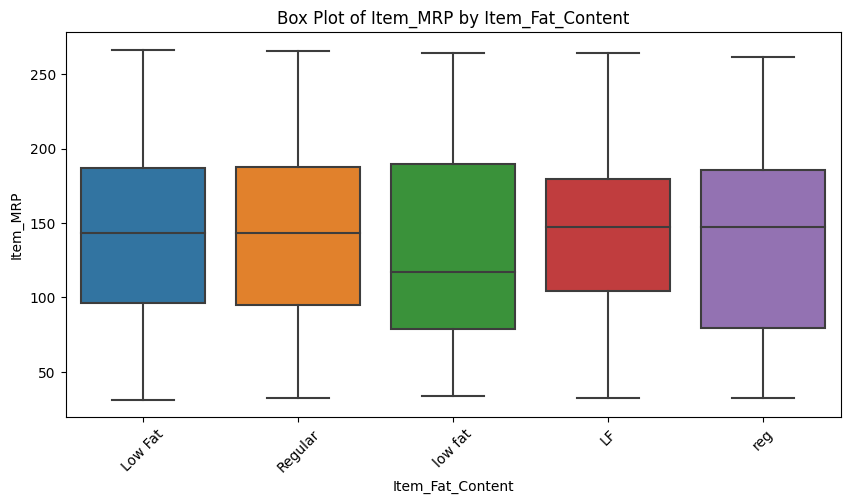

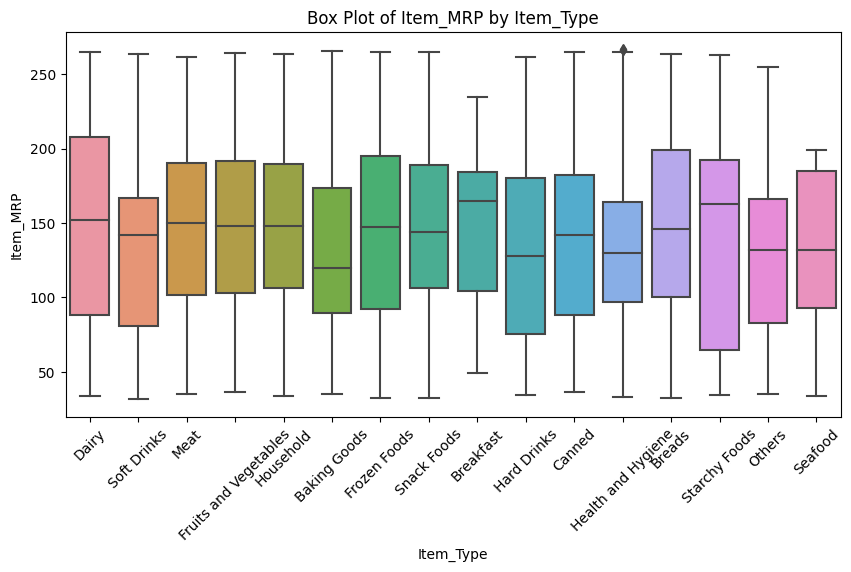

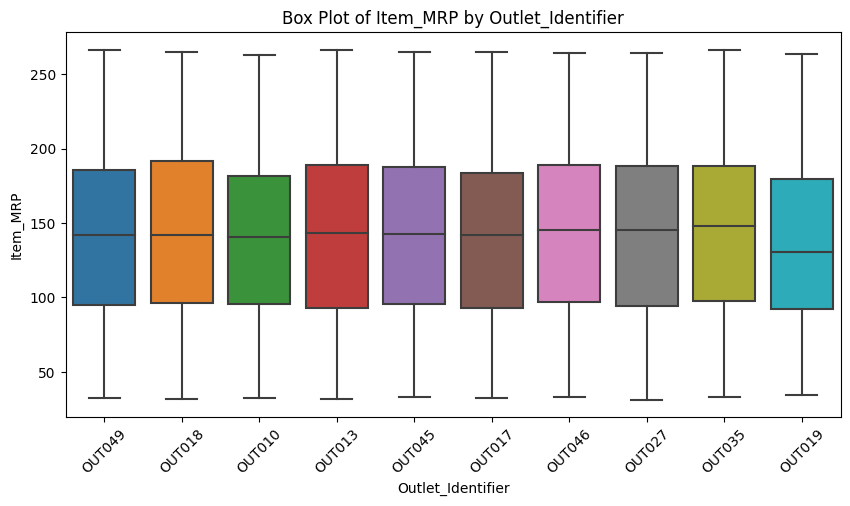

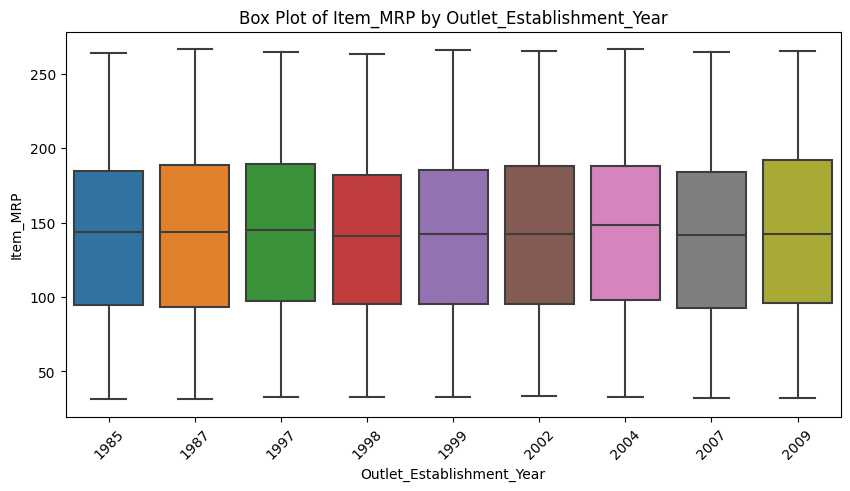

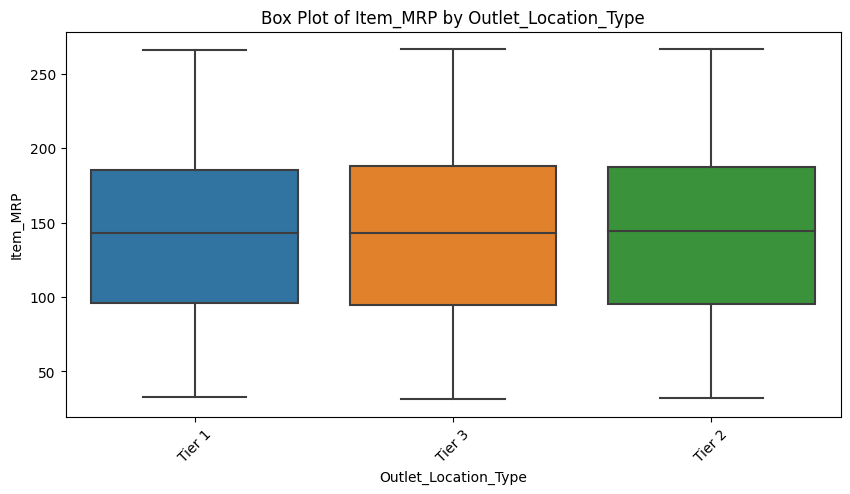

In [25]:
numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP']  # Replace with your actual numerical columns
categorical_cols = ['Outlet_Size', 'Outlet_Type','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Location_Type']

for num_col in numerical_cols:
    for cat_col in categorical_cols:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=data_1[cat_col], y=data_1[num_col], data=data_1)
        plt.title(f'Box Plot of {num_col} by {cat_col}')
        plt.xticks(rotation=45)  # Rotate category labels for readability
        plt.show()

In [794]:
data_1['Item_Fat_Content'] = data_1['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})

test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})

In [795]:
df_encoded = data_1.copy()

### new feature

In [553]:
# mean_item_mrp_per_outlet = data_1.groupby('Outlet_Identifier')['Item_MRP'].mean().reset_index()
# mean_item_weight_per_type = data_1.groupby('Item_Type')['Item_Weight'].mean().reset_index()

# df_encoded = df_encoded.merge(mean_item_mrp_per_outlet, on='Outlet_Identifier', how='left', suffixes=('', '_mean_per_outlet'))
# df_encoded = df_encoded.merge(mean_item_weight_per_type, on='Item_Type', how='left', suffixes=('', '_mean_per_item_type'))

# mean_item_mrp_per_outlet = test_df.groupby('Outlet_Identifier')['Item_MRP'].mean().reset_index()
# mean_item_weight_per_type = test_df.groupby('Item_Type')['Item_Weight'].mean().reset_index()

# test_df = test_df.merge(mean_item_mrp_per_outlet, on='Outlet_Identifier', how='left', suffixes=('', '_mean_per_outlet'))
# test_df = test_df.merge(mean_item_weight_per_type, on='Item_Type', how='left', suffixes=('', '_mean_per_item_type'))

In [796]:
df_encoded['Avg_Visibility_per_Store'] = df_encoded.groupby('Outlet_Type')['Item_Visibility'].transform('mean')
df_encoded['Item_MRP_Category'] = df_encoded.groupby('Outlet_Type')['Item_MRP'].transform('mean')
df_encoded['Visibility_to_MRP_Ratio'] = df_encoded['Item_Visibility'] / df_encoded['Item_MRP']
df_encoded['Years_Since'] = df_encoded['Outlet_Establishment_Year'].max() - df_encoded['Outlet_Establishment_Year']
df_encoded['Visibility_Rank_within_Type'] = df_encoded.groupby('Item_Type')['Item_Visibility'].rank(method="dense")
df_encoded['Price_per_Unit_Weight'] = df_encoded['Item_MRP'] / df_encoded['Item_Weight']
current_year = datetime.now().year
df_encoded["Outlet_Age"] = current_year - df_encoded["Outlet_Establishment_Year"]
df_encoded['Visibility_Age_Ratio'] = df_encoded['Item_Visibility'] / (df_encoded['Outlet_Age'] + 1)
df_encoded['Outlet_Age_MRP_Ratio'] = df_encoded['Item_MRP'] / (df_encoded['Outlet_Age'] + 1)
df_encoded['Norm_Visibility_Rank'] = df_encoded['Visibility_Rank_within_Type'] / df_encoded['Outlet_Age']
df_encoded['Item_Weight_Visibility_Interaction'] = df_encoded['Item_Weight'] * df_encoded['Item_Visibility']
df_encoded['Visibility_to_MRP_Ratio_Outlet_Age'] = df_encoded['Visibility_to_MRP_Ratio'] * df_encoded['Outlet_Age']
df_encoded['Item_MRP_Outlet_Age_Interaction'] = df_encoded['Item_MRP'] * df_encoded['Outlet_Age']
# ###Test Data
test_df['Avg_Visibility_per_Store'] = test_df.groupby('Outlet_Type')['Item_Visibility'].transform('mean')
test_df['Item_MRP_Category'] = test_df.groupby('Outlet_Type')['Item_MRP'].transform('mean')
test_df['Visibility_to_MRP_Ratio'] = test_df['Item_Visibility'] / test_df['Item_MRP']
test_df['Years_Since'] = test_df['Outlet_Establishment_Year'].max() - test_df['Outlet_Establishment_Year']
test_df['Visibility_Rank_within_Type'] = test_df.groupby('Item_Type')['Item_Visibility'].rank(method="dense")
test_df['Price_per_Unit_Weight'] = test_df['Item_MRP'] / test_df['Item_Weight']
test_df["Outlet_Age"] = current_year - test_df["Outlet_Establishment_Year"]
test_df['Visibility_Age_Ratio'] = test_df['Item_Visibility'] / (test_df['Outlet_Age'] + 1)
test_df['Outlet_Age_MRP_Ratio'] = test_df['Item_MRP'] / (test_df['Outlet_Age'] + 1)
test_df['Norm_Visibility_Rank'] = test_df['Visibility_Rank_within_Type'] / test_df['Outlet_Age']
test_df['Item_Weight_Visibility_Interaction'] = test_df['Item_Weight'] * test_df['Item_Visibility']
test_df['Visibility_to_MRP_Ratio_Outlet_Age'] = test_df['Visibility_to_MRP_Ratio'] * test_df['Outlet_Age']
test_df['Item_MRP_Outlet_Age_Interaction'] = test_df['Item_MRP'] * test_df['Outlet_Age']

In [797]:
df_encoded['Item_Identifier'] = df_encoded['Item_Identifier'].str[:2]
test_df['Item_Identifier'] = test_df['Item_Identifier'].str[:2]

In [798]:
df_encoded.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Years_Since,Visibility_Rank_within_Type,Price_per_Unit_Weight,Outlet_Age,Visibility_Age_Ratio,Outlet_Age_MRP_Ratio,Norm_Visibility_Rank,Item_Weight_Visibility_Interaction,Visibility_to_MRP_Ratio_Outlet_Age,Item_MRP_Outlet_Age_Interaction
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,10,42.0,26.861204,26,0.000594,9.252193,1.615385,0.149240,0.001670,6495.0392
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,...,0,37.0,8.153581,16,0.001134,2.839365,2.312500,0.114127,0.006390,772.3072
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,...,10,58.0,8.092457,26,0.000621,5.245111,2.230769,0.293301,0.003077,3682.0680
3,FD,19.20,Regular,0.015755,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,...,11,60.0,9.484115,27,0.000563,6.503393,2.222222,0.302502,0.002336,4916.5650
4,NC,8.93,Low Fat,0.014751,Household,53.8614,OUT013,1987,High,Tier 3,...,22,98.0,6.031512,38,0.000378,1.381062,2.578947,0.131723,0.010407,2046.7332


In [799]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Years_Since,Visibility_Rank_within_Type,Price_per_Unit_Weight,Outlet_Age,Visibility_Age_Ratio,Outlet_Age_MRP_Ratio,Norm_Visibility_Rank,Item_Weight_Visibility_Interaction,Visibility_to_MRP_Ratio_Outlet_Age,Item_MRP_Outlet_Age_Interaction
0,FD,20.7500,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,...,10,9.0,5.198178,26,0.000280,3.994896,0.346154,0.156970,0.001823,2804.4172
1,FD,8.3000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,...,2,121.0,10.520458,18,0.002023,4.595779,6.722222,0.318950,0.007921,1571.7564
2,NC,14.6000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,...,11,100.0,16.558479,27,0.003556,8.634064,3.703704,1.453794,0.011121,6527.3526
3,FD,7.3150,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,...,2,68.0,21.193985,18,0.000810,8.159684,3.777778,0.112566,0.001787,2790.6120
4,FD,8.5575,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,...,24,377.0,27.371312,40,0.002893,5.712927,9.425000,1.014914,0.020253,9369.2000


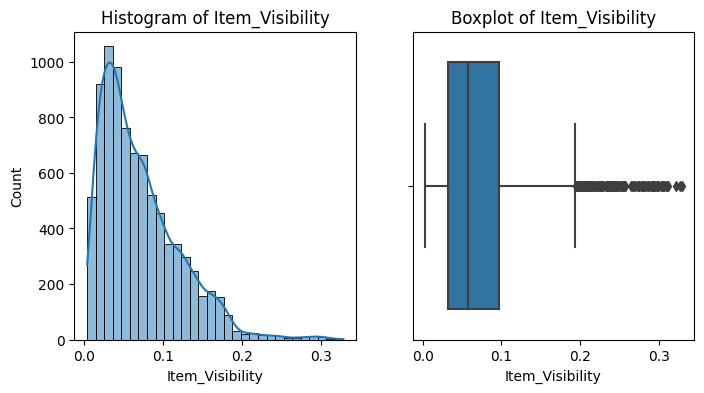

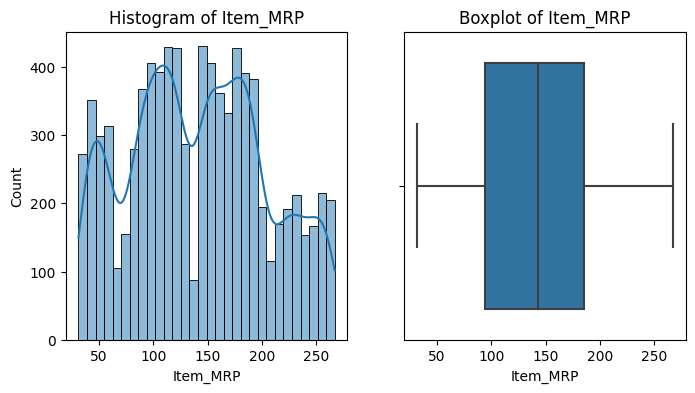

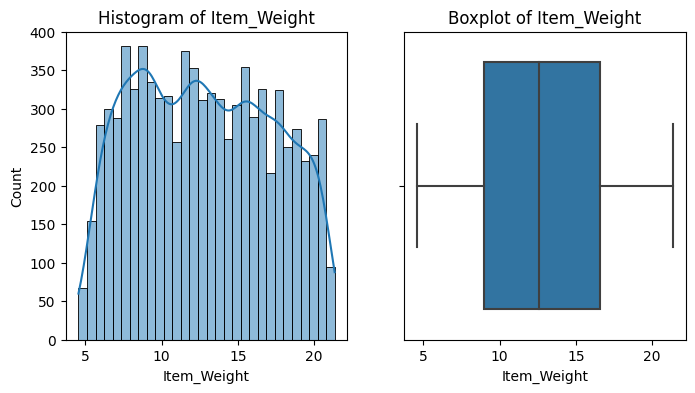

In [800]:
numerical_features = ['Item_Visibility', 'Item_MRP', 'Item_Weight']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_encoded[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature}')
    
    # Boxplot
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_encoded[feature])
    plt.title(f'Boxplot of {feature}')
    
    plt.show()

In [801]:
df_encoded['Item_Visibility'] = np.log1p(df_encoded['Item_Visibility'])
test_df['Item_Visibility'] = np.log1p(test_df['Item_Visibility'])

In [802]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Years_Since,Visibility_Rank_within_Type,Price_per_Unit_Weight,Outlet_Age,Visibility_Age_Ratio,Outlet_Age_MRP_Ratio,Norm_Visibility_Rank,Item_Weight_Visibility_Interaction,Visibility_to_MRP_Ratio_Outlet_Age,Item_MRP_Outlet_Age_Interaction
0,FD,20.7500,Low Fat,0.007536,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,...,10,9.0,5.198178,26,0.000280,3.994896,0.346154,0.156970,0.001823,2804.4172
1,FD,8.3000,Regular,0.037708,Dairy,87.3198,OUT017,2007,Medium,Tier 2,...,2,121.0,10.520458,18,0.002023,4.595779,6.722222,0.318950,0.007921,1571.7564
2,NC,14.6000,Low Fat,0.094924,Others,241.7538,OUT010,1998,Medium,Tier 3,...,11,100.0,16.558479,27,0.003556,8.634064,3.703704,1.453794,0.011121,6527.3526
3,FD,7.3150,Low Fat,0.015271,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,...,2,68.0,21.193985,18,0.000810,8.159684,3.777778,0.112566,0.001787,2790.6120
4,FD,8.5575,Regular,0.112077,Dairy,234.2300,OUT027,1985,Medium,Tier 3,...,24,377.0,27.371312,40,0.002893,5.712927,9.425000,1.014914,0.020253,9369.2000


In [803]:
cat_cols = data.select_dtypes(include=['object']).columns

for col in cat_cols:
    oe = OrdinalEncoder()
    df_encoded[col]=oe.fit_transform(df_encoded[[col]])
    print(oe.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['Low Fat', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [804]:
cat_cols = data.select_dtypes(include=['object']).columns

for col in cat_cols:
    oe = OrdinalEncoder()
    test_df[col]=oe.fit_transform(test_df[[col]])
    print(oe.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['Low Fat', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [645]:
df_encoded.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Years_Since,Visibility_Rank_within_Type,Price_per_Unit_Weight,Outlet_Age,Visibility_Age_Ratio,Outlet_Age_MRP_Ratio,Norm_Visibility_Rank,Item_Weight_Visibility_Interaction,Visibility_to_MRP_Ratio_Outlet_Age,Item_MRP_Outlet_Age_Interaction
0,1.0,9.30,0.0,0.015920,4.0,249.8092,9.0,1999,1.0,0.0,...,10,44.0,26.861204,26,0.000594,9.252193,1.692308,0.149240,0.001670,6495.0392
1,0.0,5.92,1.0,0.019095,14.0,48.2692,3.0,2009,1.0,2.0,...,0,39.0,8.153581,16,0.001134,2.839365,2.437500,0.114127,0.006390,772.3072
2,1.0,17.50,0.0,0.016621,10.0,141.6180,9.0,1999,1.0,0.0,...,10,58.0,8.092457,26,0.000621,5.245111,2.230769,0.293301,0.003077,3682.0680
3,1.0,19.20,1.0,0.015133,6.0,182.0950,0.0,1998,NaN,2.0,...,11,56.0,9.484115,27,0.000545,6.503393,2.074074,0.292766,0.002261,4916.5650
4,2.0,8.93,0.0,0.013868,9.0,53.8614,1.0,1987,0.0,2.0,...,22,76.0,6.031512,38,0.000358,1.381062,2.000000,0.124706,0.009852,2046.7332


In [640]:
df_encoded.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Size_Imputed',
       'Avg_Visibility_per_Store', 'Item_MRP_Category',
       'Visibility_to_MRP_Ratio', 'Years_Since', 'Visibility_Rank_within_Type',
       'Price_per_Unit_Weight', 'Outlet_Age', 'Visibility_Age_Ratio',
       'Outlet_Age_MRP_Ratio', 'Norm_Visibility_Rank',
       'Item_Weight_Visibility_Interaction',
       'Visibility_to_MRP_Ratio_Outlet_Age',
       'Item_MRP_Outlet_Age_Interaction'],
      dtype='object')

In [806]:
X = df_encoded[['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Location_Type',
       'Outlet_Type', 'Outlet_Size_Imputed',
       'Avg_Visibility_per_Store', 'Item_MRP_Category',
       'Visibility_to_MRP_Ratio', 'Years_Since', 'Visibility_Rank_within_Type',
       'Price_per_Unit_Weight', 'Outlet_Age', 'Visibility_Age_Ratio',
       'Outlet_Age_MRP_Ratio', 'Norm_Visibility_Rank',
       'Item_Weight_Visibility_Interaction',
       'Visibility_to_MRP_Ratio_Outlet_Age',
       'Item_MRP_Outlet_Age_Interaction']]

y = df_encoded['Item_Outlet_Sales']

#### Check Feature Importance

In [775]:
model = RandomForestRegressor()  # For regression, or RandomForestClassifier() for classification

# Fit the model to the data
model.fit(X, y)

# Get the feature importances
importances = model.feature_importances_

# Create a DataFrame to display the feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

In [776]:
display(feature_importance_df)

,Feature,Importance
0,Item_Visibility,0.087490
1,Item_MRP,0.429591
2,Outlet_Type,0.243452
3,Visibility_Rank_within_Type,0.086586
4,Outlet_Age,0.063291
5,Price_per_Unit_Weight,0.089590


In [406]:
X.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Avg_Visibility_per_Store', 'Item_MRP_Category',
       'Visibility_to_MRP_Ratio', 'Years_Since', 'Visibility_Rank_within_Type',
       'Price_per_Unit_Weight', 'Outlet_Age', 'Visibility_Age_Ratio',
       'Outlet_Age_MRP_Ratio', 'Norm_Visibility_Rank',
       'Item_Weight_Visibility_Interaction',
       'Visibility_to_MRP_Ratio_Outlet_Age',
       'Item_MRP_Outlet_Age_Interaction'],
      dtype='object')

In [805]:
X = df_encoded[['Item_Visibility','Item_MRP','Outlet_Type','Visibility_Rank_within_Type','Outlet_Age','Price_per_Unit_Weight']]

In [727]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Type,Visibility_Rank_within_Type,Outlet_Age
0,9.30,0.015920,249.8092,1.0,44.0,26
1,5.92,0.019095,48.2692,2.0,39.0,16
2,17.50,0.016621,141.6180,1.0,58.0,26
3,19.20,0.015133,182.0950,0.0,56.0,27
4,8.93,0.013868,53.8614,1.0,76.0,38


In [728]:
X.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Type',
       'Visibility_Rank_within_Type', 'Outlet_Age'],
      dtype='object')

                                    Item_Weight  Item_MRP   
Item_Weight                            1.000000  0.024839  \
Item_MRP                               0.024839  1.000000   
Avg_Visibility_per_Store              -0.005366 -0.003865   
Visibility_Rank_within_Type            0.011714  0.027320   
Price_per_Unit_Weight                 -0.597132  0.699504   
Visibility_Age_Ratio                  -0.013087 -0.008734   
Outlet_Age_MRP_Ratio                   0.019910  0.812119   
Norm_Visibility_Rank                   0.010961  0.023289   
Item_Weight_Visibility_Interaction     0.411173  0.008251   
Visibility_to_MRP_Ratio_Outlet_Age    -0.018304 -0.463105   
Item_MRP_Outlet_Age_Interaction        0.019714  0.794284   
Outlet_Identifier_encoded              0.001729 -0.000221   
Outlet_Type_encoded                    0.001134 -0.000551   

                                    Avg_Visibility_per_Store   
Item_Weight                                        -0.005366  \
Item_MRP         

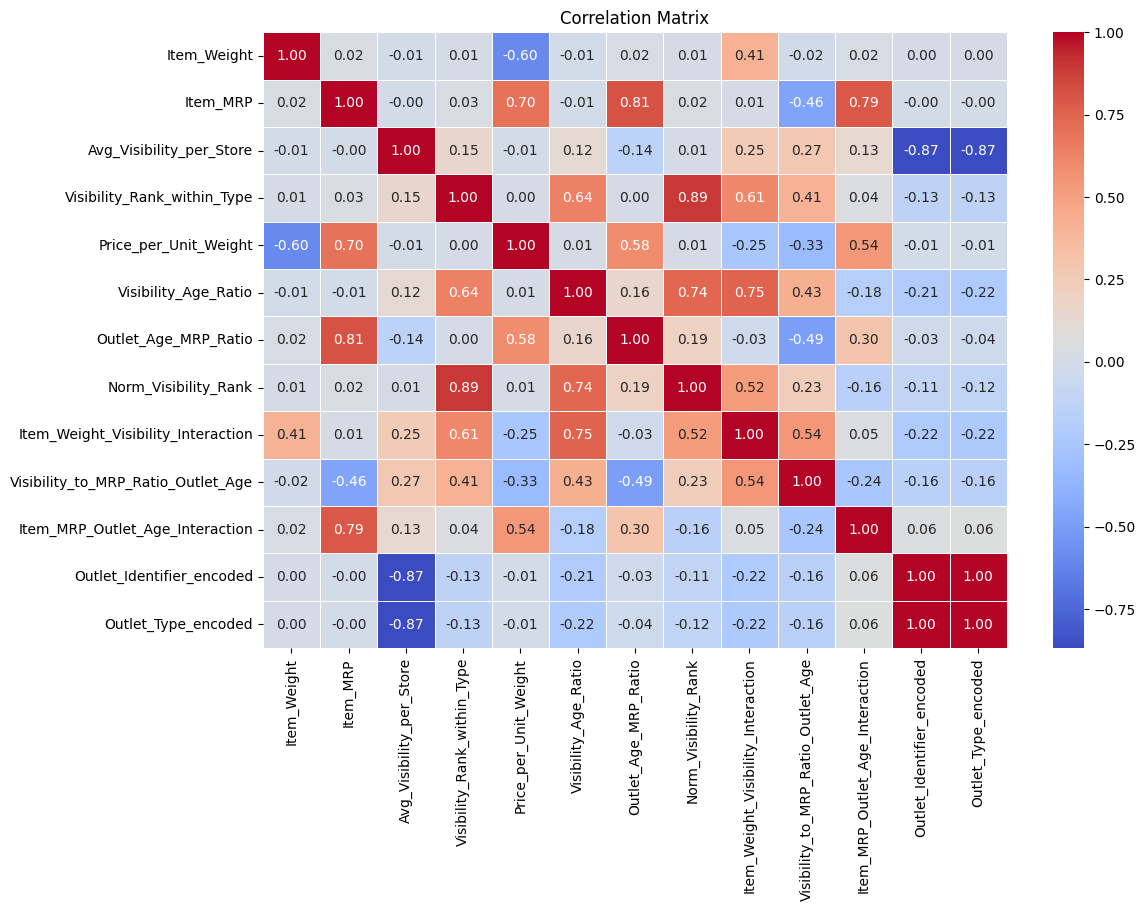

In [497]:
correlation_matrix = X.corr() # Print the correlation matrix
print(correlation_matrix) 
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5) 
plt.title('Correlation Matrix') 
plt.show()

In [518]:
display(feature_importance_df)

,Feature,Importance
0,Item_Identifier,0.010224
1,Item_Weight,0.076089
2,Item_Fat_Content,0.009548
3,Item_Visibility,0.110314
4,Item_Type,0.041931
5,Item_MRP,0.473664
6,Outlet_Identifier,0.016921
7,Outlet_Size,0.009101
8,Outlet_Location_Type,0.006849
9,Outlet_Type,0.183744


In [398]:
X.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Outlet_Age'],
      dtype='object')

In [399]:
columns_to_drop = [
    'Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year',
    'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type'
]

In [400]:
X_1=X.drop(columns=columns_to_drop,axis=1)

In [705]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Type,Visibility_Rank_within_Type,Outlet_Age
0,9.30,0.015920,249.8092,1.0,44.0,26
1,5.92,0.019095,48.2692,2.0,39.0,16
2,17.50,0.016621,141.6180,1.0,58.0,26
3,19.20,0.015133,182.0950,0.0,56.0,27
4,8.93,0.013868,53.8614,1.0,76.0,38


In [706]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [310]:
! pip install catboost

     ------------------------------------ 101.7/101.7 MB 433.8 kB/s eta 0:00:00
  Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)
     -------------------------------------- 14.8/14.8 MB 447.8 kB/s eta 0:00:00
  Using cached narwhals-1.24.1-py3-none-any.whl (309 kB)


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\INASRAT1\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\catboost\\_catboost.pyd'
Consider using the `--user` option or check the permissions.



In [160]:
import catboost
from catboost import CatBoostRegressor

In [227]:
# Define parameter grid
param_grid = {
    'iterations': [100, 200, 300, 500, 1000],  # Fixed typo in iterations
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}

# Initialize CatBoost Model
cat_model = CatBoostRegressor(loss_function='RMSE', random_state=42, verbose=0)

# Perform Grid Search using sklearn's GridSearchCV
grid_search = GridSearchCV(
    estimator=cat_model, 
    param_grid=param_grid, 
    cv=5,  # Cross-validation folds
    scoring='neg_root_mean_squared_error',  # RMSE as evaluation metric
    n_jobs=-1,  # Use all available cores
    verbose=2
)

grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred_best = best_model.predict(X_test)

# Compute Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2 = r2_score(y_test, y_pred_best)

print(f'Optimized RMSE: {rmse:.4f}')
print(f'Optimized R² Score: {r2:.4f}')

# Display best parameters
print("Best parameters found:", grid_search.best_params_)


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Optimized RMSE: 1021.5162
Optimized R² Score: 0.6161
Best parameters found: {'depth': 4, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.01}


In [248]:
from sklearn.model_selection import RandomizedSearchCV

In [249]:
param_dist = {
    'iterations': [1000, 2000, 3000],
    'learning_rate': [0.001, 0.005, 0.01, 0.05],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 10, 50, 100],
    'bagging_temperature': [0.5, 1, 5, 10],
    'subsample': [0.7, 0.8, 0.9, 1],
    'grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide']
}

# Initialize CatBoost Model
cat_model = CatBoostRegressor(loss_function='RMSE', random_state=42, verbose=0)

# Perform Randomized Search for better efficiency
random_search = RandomizedSearchCV(
    estimator=cat_model, 
    param_distributions=param_dist, 
    cv=5,  
    scoring='neg_root_mean_squared_error',  
    n_iter=20,  # Try 20 random combinations
    n_jobs=-1,  
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

# Best model from search
best_model = random_search.best_estimator_

# Predict using the best model
y_pred_best = best_model.predict(X_test)

# Compute Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2 = r2_score(y_test, y_pred_best)

print(f'Optimized RMSE: {rmse:.4f}')
print(f'Optimized R² Score: {r2:.4f}')
print("Best parameters found:", random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Optimized RMSE: 1019.9568
Optimized R² Score: 0.6172
Best parameters found: {'subsample': 1, 'learning_rate': 0.005, 'l2_leaf_reg': 1, 'iterations': 1000, 'grow_policy': 'SymmetricTree', 'depth': 6, 'bagging_temperature': 5}


In [815]:
# ! pip install ipywidgets

In [76]:
# Define categorical features
cat_features = ['Item_Identifier','Item_Type', 'Outlet_Identifier', 'Outlet_Type']
 
# Convert categorical columns to strings
X_train[cat_features] = X_train[cat_features].astype(str)
X_test[cat_features] = X_test[cat_features].astype(str)
 
# Create CatBoost Pool
train_pool = Pool(X_train, label=y_train, cat_features=cat_features)

# Define parameter grid manually (CatBoost does not support GridSearchCV directly)
param_grid = {
    'iterations': 1000,
    'learning_rate': 0.01,
    'depth': 6,
    'l2_leaf_reg': 1,
    'loss_function': 'RMSE',
    'random_seed': 42
}
 
# Perform Cross-Validation using CatBoost's built-in method
cv_results = cv(train_pool, param_grid, fold_count=5, plot=True)
 
# Train the final model using the best parameters
best_catboost = CatBoostRegressor(**param_grid)
best_catboost.fit(X_train, y_train, cat_features=cat_features, verbose=100)
 
# Predictions
y_train_pred = best_catboost.predict(X_train)
 
# Evaluate Model Performance
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
 
print(f'Training RMSE: {rmse_train:.4f}')
print(f'Training R² Score: {r2_train:.4f}')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]
0:	learn: 2757.8840384	test: 2824.7959668	best: 2824.7959668 (0)	total: 95.9ms	remaining: 1m 35s
1:	learn: 2735.7865307	test: 2802.4534837	best: 2802.4534837 (1)	total: 254ms	remaining: 2m 6s
2:	learn: 2713.6656322	test: 2779.8945189	best: 2779.8945189 (2)	total: 449ms	remaining: 2m 29s
3:	learn: 2692.0448571	test: 2757.8600341	best: 2757.8600341 (3)	total: 580ms	remaining: 2m 24s
4:	learn: 2669.9133188	test: 2735.5968243	best: 2735.5968243 (4)	total: 691ms	remaining: 2m 17s
5:	learn: 2648.1431201	test: 2713.7351958	best: 2713.7351958 (5)	total: 797ms	remaining: 2m 12s
6:	learn: 2627.2198386	test: 2692.6011490	best: 2692.6011490 (6)	total: 916ms	remaining: 2m 9s
7:	learn: 2606.4553568	test: 2671.4211734	best: 2671.4211734 (7)	total: 1.04s	remaining: 2m 9s
8:	learn: 2585.9824191	test: 2650.6810187	best: 2650.6810187 (8)	total: 1.16s	remaining: 2m 8s
9:	learn: 2565.3734309	test: 2629.7584041	best: 2629.7584041 (9)	total: 1.3s	remaining: 2m 8s
10:	learn: 2545.024472

In [707]:
# Primary CatBoost Model
cat_model = CatBoostRegressor(
    iterations=1000,  
    learning_rate=0.01,
    depth=6,
    l2_leaf_reg=1,
    loss_function='RMSE',
    verbose=0,
    thread_count=1
)
 
# Train the primary model
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)
 
# Get predictions on train set
y_pred_train = cat_model.predict(X_train)
 
# Compute residuals
residuals = y_train - y_pred_train  # Difference between actual and predicted
 
# Train a Ridge Regression model on residuals
residual_model = Ridge(alpha=1.0)  # You can tune alpha for better performance
residual_model.fit(X_train, residuals)
 
# Get predictions on test set
y_pred_test_catboost = cat_model.predict(X_test)
y_pred_test_residuals = residual_model.predict(X_test)
 
# Final adjusted predictions
y_pred_test = y_pred_test_catboost + y_pred_test_residuals
 
# Evaluate the performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
 
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

RMSE: 1020.8250
MAE: 716.2279
R² Score: 0.6166


In [807]:
cat_model = CatBoostRegressor(
    iterations=1000,  
    learning_rate=0.01,
    depth=5,
    l2_leaf_reg= 1,
    loss_function='RMSE',
    verbose=0,
    thread_count=1,  
)

# Train the model
# cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)
cat_model.fit(X,y, early_stopping_rounds=50)
# Predict on test data
# y_pred = cat_model.predict(X_test)

# # Evaluate model performance
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# mse=mean_absolute_error(y_test,y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f'RMSE: {rmse:.4f}')
# print(f'mse: {mse:.4f}')
# print(f'R² Score: {r2:.4f}')

In [808]:
# X = df_encoded[['Item_Weight','Item_Type','Item_MRP','Outlet_Type','Avg_Visibility_per_Store','Years_Since','Visibility_Rank_within_Type','Visibility_Age_Ratio','Visibility_to_MRP_Ratio_Outlet_Age']]

In [809]:
X.columns

Index(['Item_Visibility', 'Item_MRP', 'Outlet_Type',
       'Visibility_Rank_within_Type', 'Outlet_Age', 'Price_per_Unit_Weight'],
      dtype='object')

In [810]:
# test_df_1 = test_df[['Item_Identifier_encoded','Item_Weight', 'Item_MRP', 'Visibility_Rank_within_Type',
#        'Item_Weight_Visibility_Interaction',
#        'Visibility_to_MRP_Ratio_Outlet_Age', 'Outlet_Identifier_encoded']]

In [811]:
test_df_1 = test_df[['Item_Visibility','Item_MRP','Outlet_Type','Visibility_Rank_within_Type','Outlet_Age','Price_per_Unit_Weight']]

In [812]:
test_predictions = cat_model.predict(test_df_1)

In [813]:
test_df_1=pd.read_csv('test_data.csv')

In [814]:
test_df_1['Item_Outlet_Sales'] = test_predictions
test_df_1[['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales']].to_csv("test_predictions_19.csv", index=False)

In [712]:
test_df_1[test_df_1['Item_Outlet_Sales']<0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
